###  线性回归
最小二乘估计 <<==>> noise为高斯分布的MLE  
f(w) = transpose(W)*X + b，我们把w和b吸收入向量的形式w_hat = (w;b)，把数据集X增加一列。  
在本例中，X是一个NxP维的数据，N代表样本数为47，p代表特征数为2，所以W是一个2X1的矩阵

In [212]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [213]:
# 加载数据
# 再给出的例子中X有2个属性分别为x1，x2
def loadData(filePath, split, dataType):
    return np.loadtxt(filePath,delimiter=split,dtype=dataType)

# 可视化图像
def plotShow(X, y):
    ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
    ax.scatter(X[:,0], X[:,1], y)
    ax.set_zlabel('Z')  # 坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.show()

    # 画每次迭代代价的变化图
def plotJ(J_history,num_iters):
    x = np.arange(1,num_iters+1)
    plt.plot(x,J_history)
    plt.xlabel(u"Iteration") # 注意指定字体，要不然出现乱码问题
    plt.ylabel(u"loss")
    plt.title(u"Loss-Iterations")
    plt.show()
    
    
def featureNormalize(X):
    X = np.array(X)
    mu = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    
    mu = np.mean(X, 0)
    sigma = np.std(X, 0)
    
    for col in range(X.shape[1]):
        X[:, col] = (X[:, col] - mu[col]) / sigma[col]
        
    return X, mu, sigma

def linearRegression(X, y, lr, iters):
    # 把w和b融合到一起，把数据X增加一列，见西瓜书P55
    m = len(y)
    
    # y = w0 + x1*w1 + x2*w2
    X = np.hstack((X, np.ones((m, 1))))
    w = np.zeros((X.shape[1], 1))
    y = y.reshape(-1, 1)
    
    w, J = gradientDescent(X, y, w, lr, iters)
    return w, J
    

def gradientDescent(X, y, w, lr, iters):
    m = len(y)
    n = len(w)
    tmp = np.matrix(np.zeros((n, iters)))
    
    loss = np.zeros((iters, 1))
    
    for i in range(iters): # 遍历迭代次数
        h = np.dot(X, w)
        # L对w的偏导数 = 2transpose(X)*X*w - 2*transpose(X)*Y
        tmp[:,i] = w - (2/m)*lr*(np.dot(np.transpose(X), h - y))
        w = tmp[:,i]
        loss[i] = computeLoss(X, y, w)
    #print(loss)
    return w, loss
        
def computeLoss(X, y, w):
    m = len(y)
    J = 0
    J = 1/m * (np.transpose(X*w-y)*(X*w-y))
    return J


def predict(X, w, mu, sigma):
    X = (X - mu) / sigma
    X = np.hstack((X, np.ones((1))))
    result = np.dot(X, w)
    return result
    
    
def main():
    print("Loading data...\n")
    data = loadData('./data/data.txt', ',', np.float64)
    X= data[:, :-1]
    y = data[:, -1]
    print("Plot data...\n")
    plotShow(X, y)
    
    print("Plot normalized data...\n")
    X, mu, sigma = featureNormalize(X)
    plotShow(X, y)
    
    print("Training...\n")
    iters = 3000
    w, J = linearRegression(X, y, lr=0.001, iters=iters)
    plotJ(J, iters)
    print("W is: ", w)
    
    
    # 对于新来的X，测试其结果
    dataPredict = [1940, 4]
    print("Predict result is: ", predict(dataPredict, w, mu, sigma)[0][0])
    

Loading data...

Plot data...



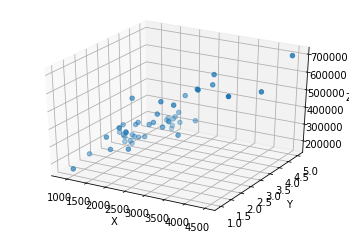

Plot normalized data...



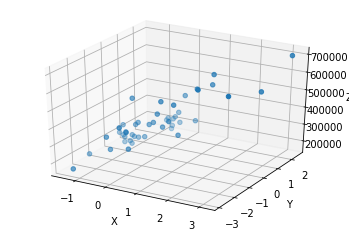

Training...



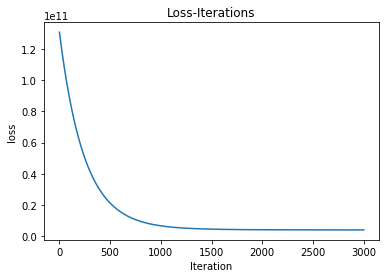

W is:  [[105309.1679027 ]
 [ -2448.45642589]
 [339573.91530733]]
Predict result is:  [[328747.22028229]]


In [214]:
main()